# [exp 07]: Image Filters and Kernel evaluation

## Introduction

Image filters can be used to extract meaningful features from images for various tasks, which  play a crucial role in image processing, it allow us to manipulate and enhance digital images in various ways. These filters are mathematical operations applied to images, involve convolving the image with a kernel (mask). 

in this lab we will use edge detection filters like Canny, Sobel, Hanny (Laplacian based on Gaussian matrix (Hanny-laplacian)) and blur filters like Gaussian filter and evaluate their kernel sizes to choose the best one.

## Implementation

<u>**1.Blur Filters:**</u> these filters reduce image details and sharpness, which resulting in a softened appearance. This blurring effect can be useful for simulating depth of field, reduce image artifacts and anonymizing sensitive information in the image.

The Gaussian kernel can be generated using the following formula:

$$
G(x, y) = \frac{1}{2\pi\sigma^2} \exp{\left(-\frac{x^2 + y^2}{2\sigma^2}\right)}
$$

Where:

$(x,y):$ The coordinates within the kernel matrix. These values are used to compute the distance from the center of the kernel.

$σ:$ The standard deviation determines the spread or width of the Gaussian distribution. A larger (σ)
value results in a wider and smoother Gaussian curve. 

Example Gaussian kernel for σ = 1 and k = 5:

<center>

| 0.003 | 0.013 | 0.022 | 0.013 | 0.003 |
|---|---|---|---|---|
| 0.013 | 0.059 | 0.097 | 0.059 | 0.013 |
| 0.022 | 0.097 | 0.159 | 0.097 | 0.022 |
| 0.013 | 0.059 | 0.097 | 0.059 | 0.013 |
| 0.003 | 0.013 | 0.022 | 0.013 | 0.003 |

</center>

<u>**2.Edge Detection Filters:**</u> this king filters highlight sudden changes in intensity such as edges and boundaries between objects by convolving the image with specific kernels that emphasize horizontal, vertical, or diagonal edges.

<u>**2.1.Sobel Filter:**</u> The Sobel operator is a discrete differentiation operator used to compute the gradient magnitude of an image, it is defined by two kernels, one for detecting horizontal edges and the other for vertical edges.

Horizontal Sobel Kernel:

<center>

| -1 | 0 | 1 |
|---|---|---|
| -2 | 0 | 2 |
| 1 | 0 | 1 |

</center>

Vertical Sobel Kernel:

<center>

| -1 | -2 | -1 |
|---|---|---|
| 0 | 0 | 0 |
| 1 | 2 | 1 |
 
</center> 

<u>**2.2.Canny Filter:**</u> The primary kernel used in the Canny edge detection algorithm is the same Sobel operator.

<u>**2.3.Hanny Filter:**</u> The Hanny filter is a hybrid edge detection filter that combines Gaussian smoothing with the Laplacian of Gaussian (LoG) operator.

Where:
- Gaussian Kernel: The Gaussian kernel is used to smooth the image and reduce noise. It is a two-dimensional matrix obtained by evaluating the Gaussian function at different coordinates.

- Laplacian of Gaussian (LoG) Kernel: The LoG kernel is derived from the Laplacian operator applied to the Gaussian-smoothed image. It enhances edges by emphasizing areas of rapid intensity change.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

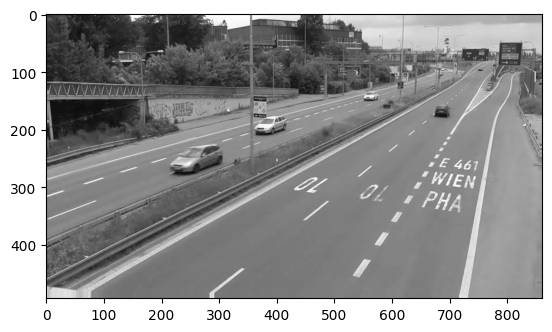

In [2]:
img = cv2.imread("../dataset/frames/train/video12/00012_1640.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img_gray,cmap='gray')

Text(0.5, 1.0, 'Hanny')

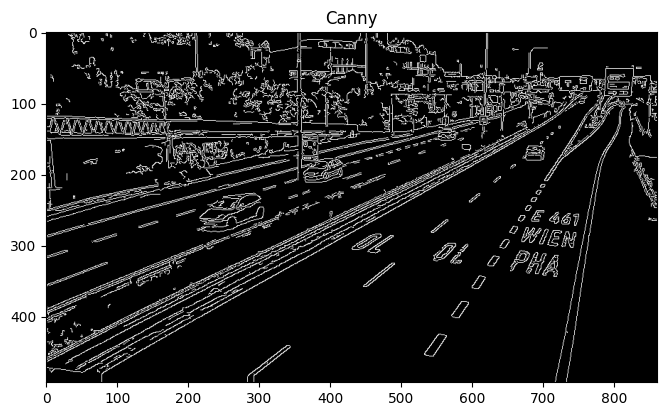

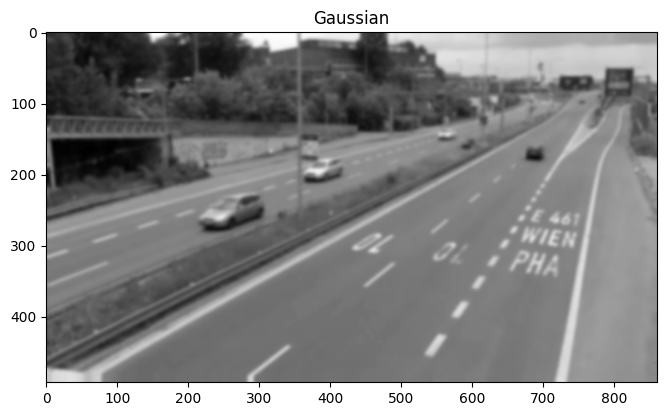

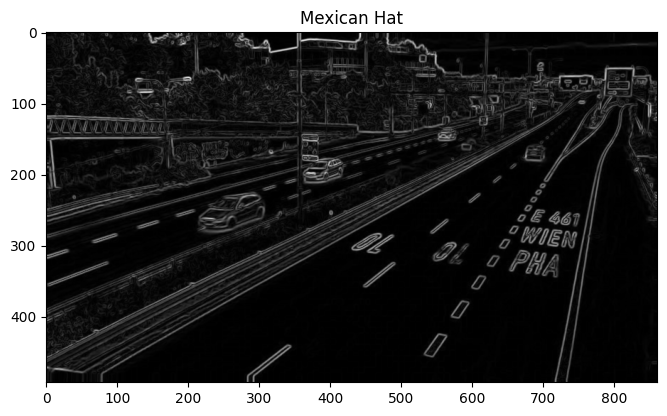

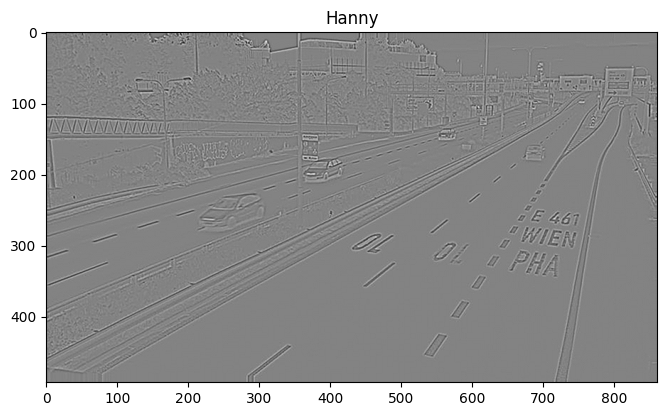

In [3]:
edges = cv2.Canny(img_gray, 100, 200)

blurred = cv2.GaussianBlur(img_gray, (13,13), 0)

sobel_x = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=5)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

log = cv2.Laplacian(cv2.GaussianBlur(img_gray, (3, 3), 0), cv2.CV_64F)

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.imshow(edges,cmap='gray')
plt.title('Canny')

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.imshow(blurred,cmap='gray')
plt.title('Gaussian')

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.imshow(sobel_combined,cmap='gray')
plt.title('Mexican Hat')

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.imshow(log,cmap='gray')
plt.title('Hanny')

Kernel size: (3, 3), Edge Density: 230, Edge Length: 29242.175777077675
Kernel size: (5, 5), Edge Density: 121, Edge Length: 14888.496168971062
Kernel size: (7, 7), Edge Density: 53, Edge Length: 3416.036905646324


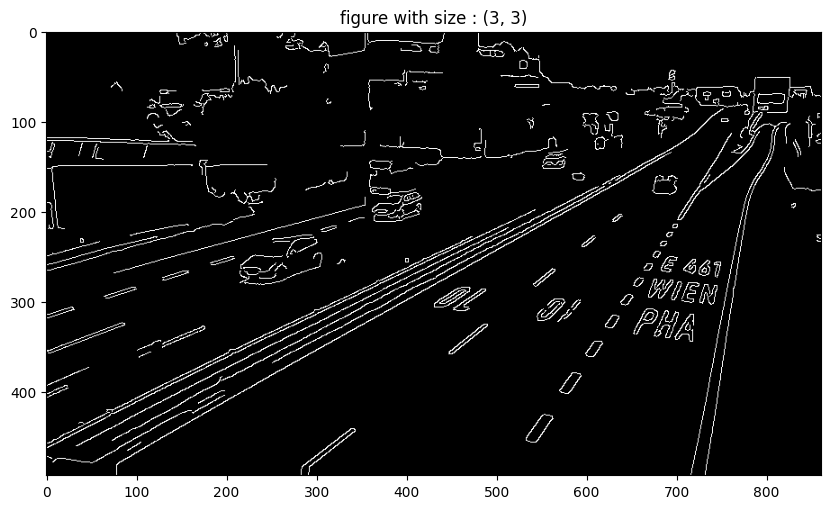

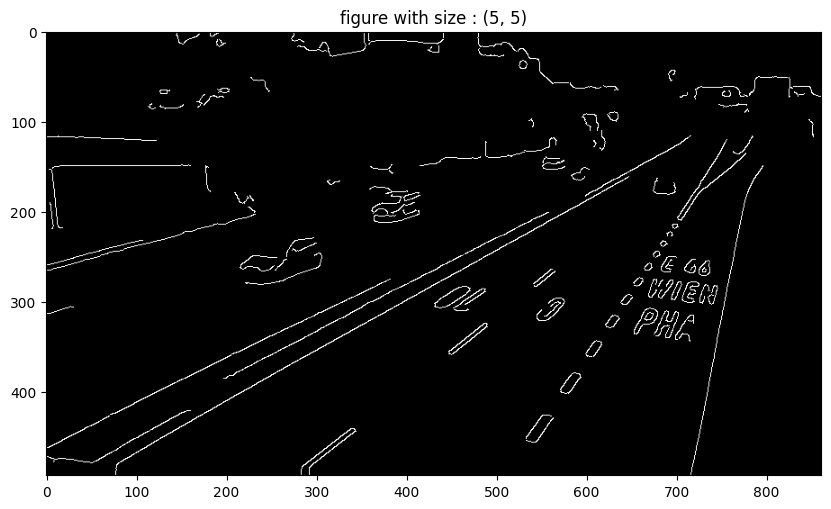

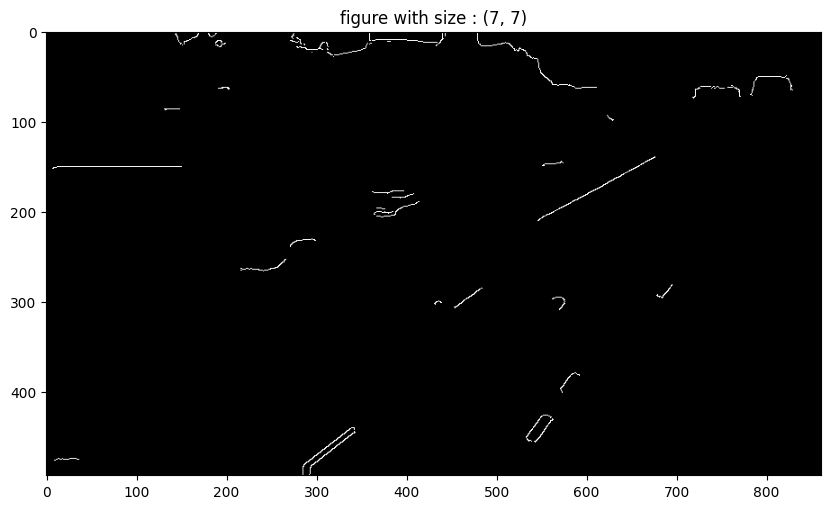

In [4]:
kernel_sizes = [(3, 3), (5,5), (7,7)]

def compute_metrics(edges):
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    edge_density = len(contours)
    
    total_length = 0
    for contour in contours:
        total_length += cv2.arcLength(contour, closed=True)
    edge_length = total_length
    
    return edge_density, edge_length

def img_to_edges(img, blur_kernel=(5, 5)):
    img_med = np.median(img)
    img_med_lower = int(max(0, 0.7 * img_med))
    img_med_upper = int(min(255, 1.3 * img_med))

    img_blur = cv2.blur(img, blur_kernel)
    img_edges = cv2.Canny(img_blur, img_med_lower, img_med_upper)
    
    return img_edges

img_gray = cv2.blur(img_gray, (3,3))
for kernel_size in kernel_sizes:

    detected_edges = img_to_edges(img_gray,kernel_size)

    edge_density, edge_length = compute_metrics(detected_edges)

    print(f"Kernel size: {kernel_size}, Edge Density: {edge_density}, Edge Length: {edge_length}")
    
    plt.figure(figsize=(10,8))
    plt.imshow(detected_edges,cmap='gray')
    plt.title(f"figure with size : {kernel_size}")

Kernel size: (3, 3), Edge Density: 446, Edge Length: 47607.389769911766
Kernel size: (5, 5), Edge Density: 283, Edge Length: 24955.39666211605
Kernel size: (7, 7), Edge Density: 129, Edge Length: 7653.186516523361


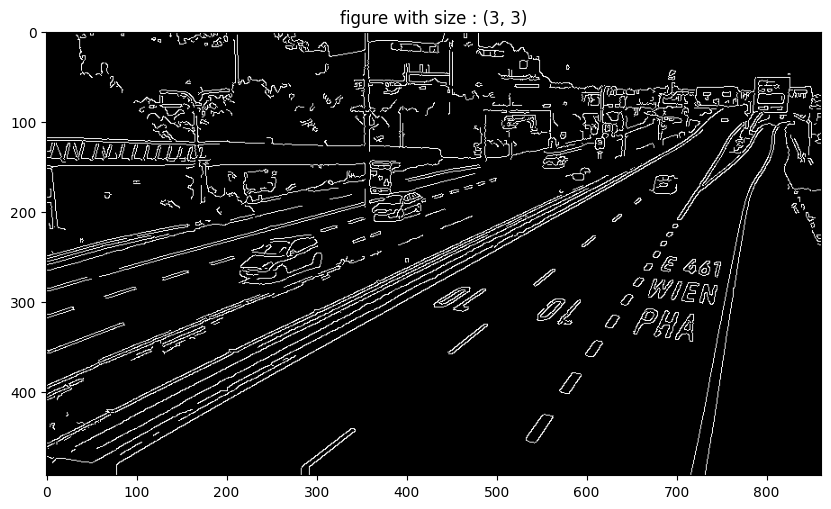

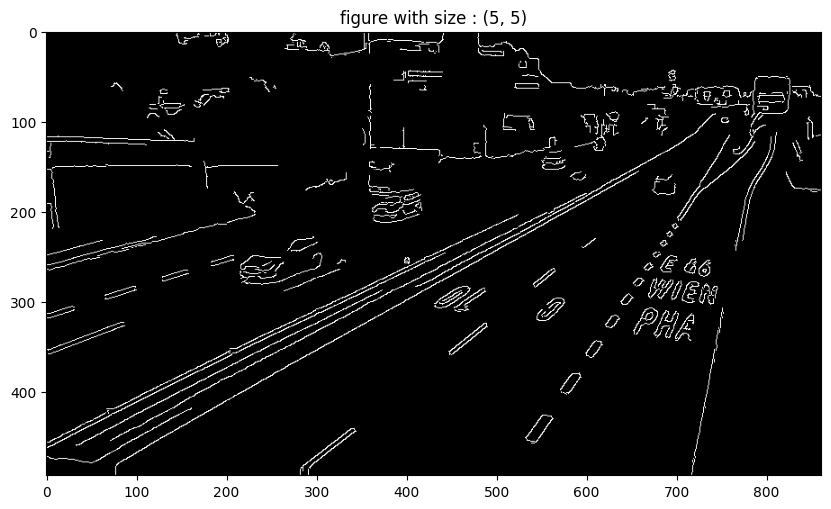

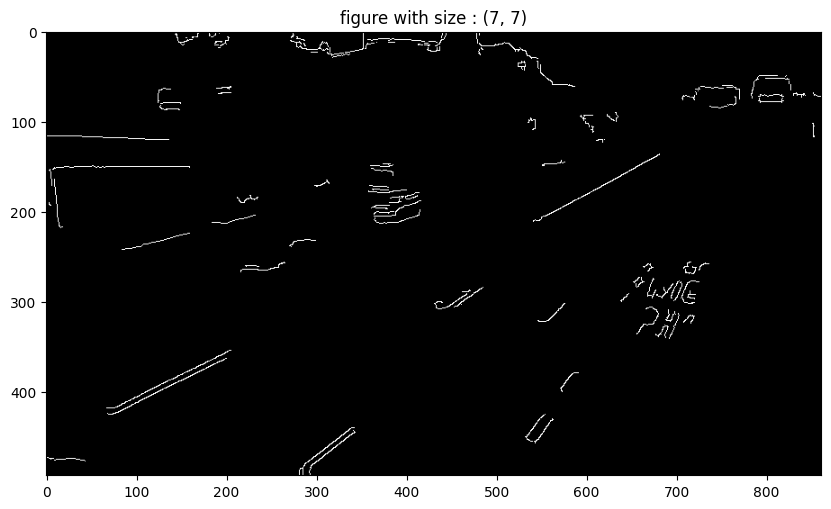

In [5]:
kernel_sizes = [(3, 3), (5,5), (7,7)]

def compute_metrics(edges):
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    edge_density = len(contours)
    
    total_length = 0
    for contour in contours:
        total_length += cv2.arcLength(contour, closed=True)
    edge_length = total_length
    
    return edge_density, edge_length

def img_to_edges(img, blur_kernel=(5, 5)):
    img_med = np.median(img)
    img_med_lower = int(max(0, 0.7 * img_med))
    img_med_upper = int(min(255, 1.3 * img_med))

    img_blur = cv2.blur(img, blur_kernel)
    img_edges = cv2.Canny(img_blur, img_med_lower, img_med_upper)
    
    return img_edges


for kernel_size in kernel_sizes:

    detected_edges = img_to_edges(img,kernel_size)

    edge_density, edge_length = compute_metrics(detected_edges)

    print(f"Kernel size: {kernel_size}, Edge Density: {edge_density}, Edge Length: {edge_length}")
    
    plt.figure(figsize=(10,8))
    plt.imshow(detected_edges,cmap='gray')
    plt.title(f"figure with size : {kernel_size}")

## Conclusion

We determine visually that the best kernel size for the filters used is the kernel 3*3.